<a href="https://colab.research.google.com/github/WhiteBeyond/AI/blob/main/New_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import libs
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [ ]:
#prepare data
weather = pd.read_csv('/content/drive/MyDrive/Weather/HCM.csv', index_col='datetime')

<Axes: >

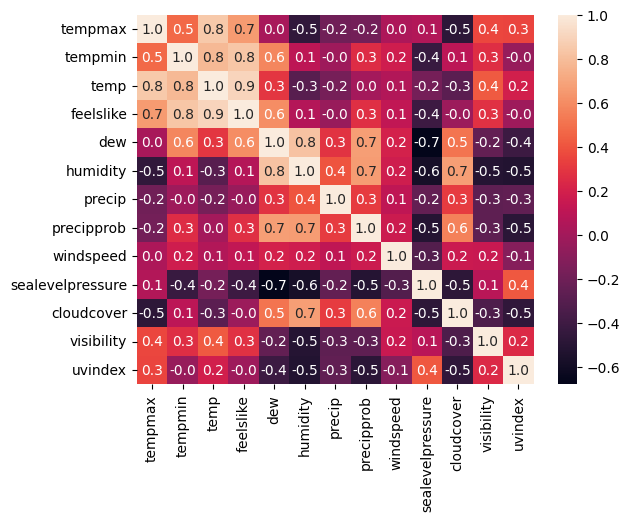

In [ ]:
#specifile some index for correlation
correlation_weather = weather[['tempmax','tempmin','temp','feelslike','dew', 'humidity', 'precip', 'precipprob',
                               'windspeed', 'sealevelpressure', 'cloudcover','visibility','uvindex'
                               ]].copy()
correlation = correlation_weather.corr()
sns.heatmap(correlation, annot = True, annot_kws={"ha": 'center'}, fmt='.1f' )

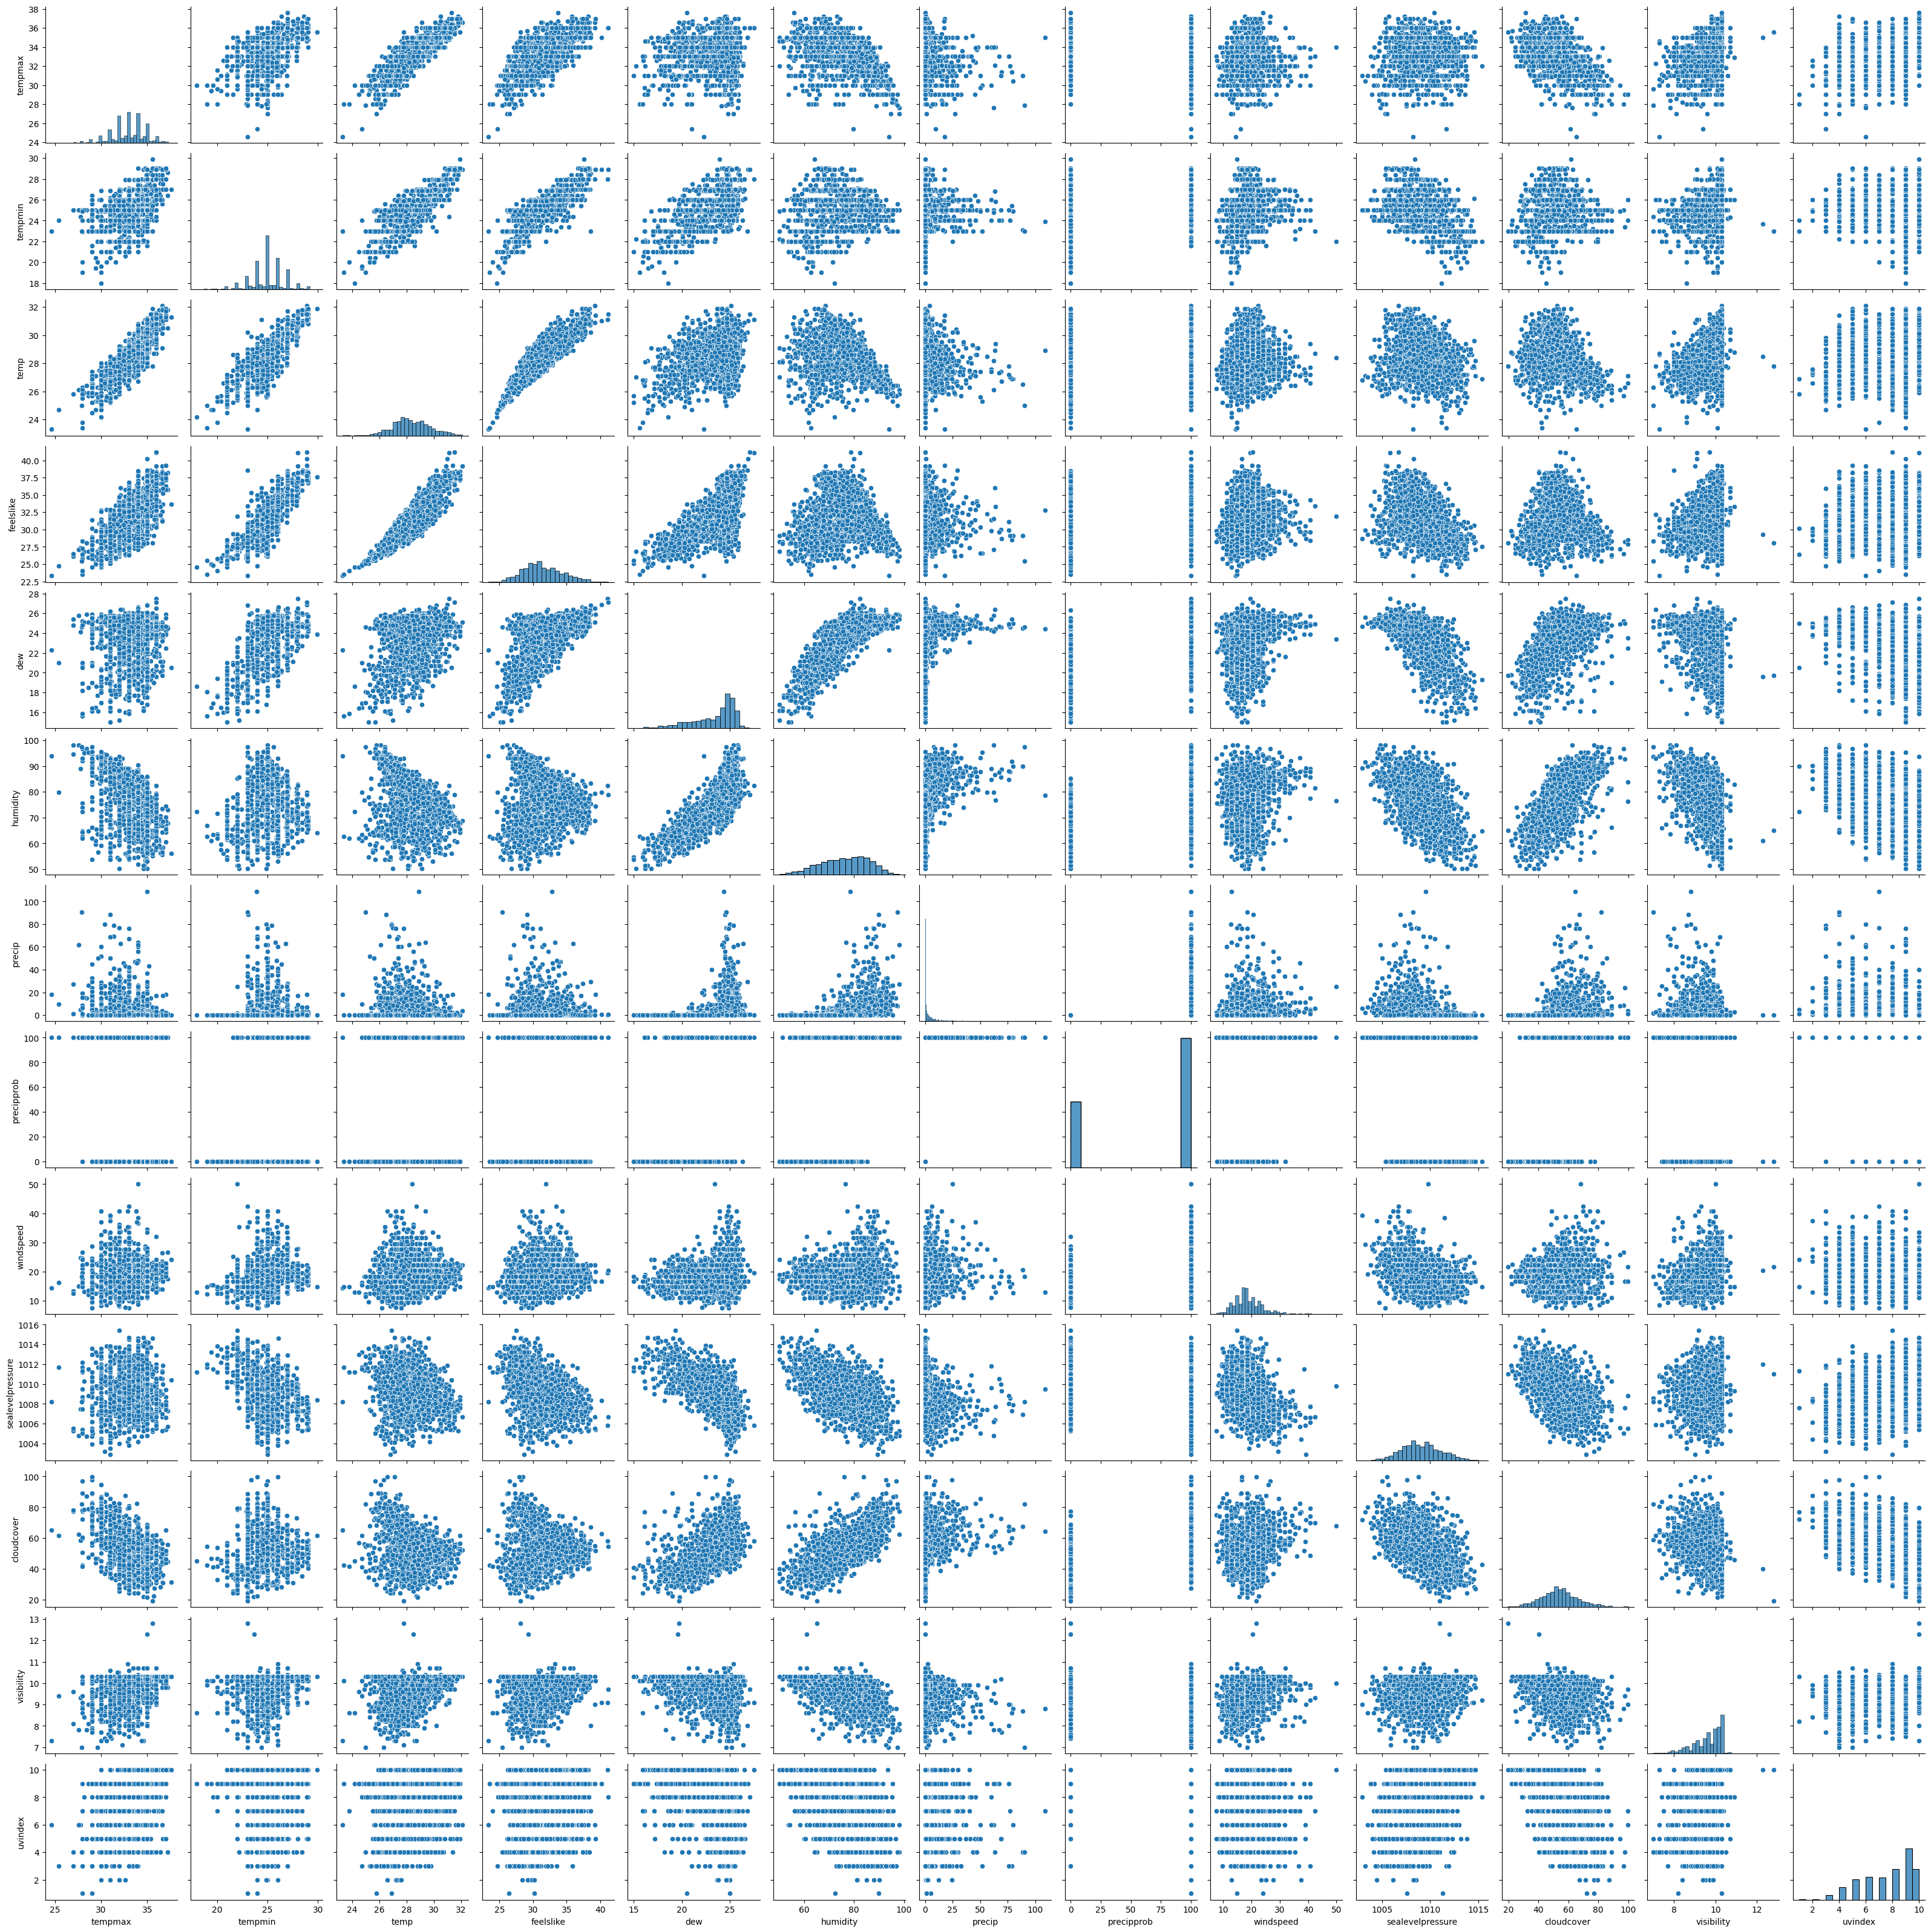

In [ ]:
sns.pairplot(correlation_weather)

In [ ]:
core_weather = weather[['tempmax','tempmin','temp','feelslike','humidity','precip', 'precipprob', 'preciptype',
                        'windspeed', 'sealevelpressure', 'cloudcover','visibility','uvindex','sunrise', 'sunset', 'conditions'
                      ]].copy()


In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

In [ ]:
#replace NaN to '0' 
core_weather["preciptype"] = core_weather["preciptype"].fillna(0)
core_weather["preciptype"].replace({"rain": "1"}, inplace=True)
c_weather = core_weather.copy()

In [ ]:
#convert index to datetime for better search 
core_weather.index = pd.to_datetime(core_weather.index)
c_weather.index = pd.to_datetime(c_weather.index)

In [ ]:
target_vars = ['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windspeed', 'sealevelpressure', 'visibility', 'uvindex']
target_vars

['tempmax',
 'tempmin',
 'temp',
 'humidity',
 'precip',
 'windspeed',
 'sealevelpressure',
 'visibility',
 'uvindex']

In [ ]:
for t in target_vars:
    core_weather[f"target_{t}"] = core_weather.shift(-1)[t]

core_weather = core_weather.iloc[:-1,:].copy()

In [ ]:
core_weather

,tempmax,tempmin,temp,feelslike,humidity,precip,precipprob,preciptype,windspeed,sealevelpressure,...,conditions,target_tempmax,target_tempmin,target_temp,target_humidity,target_precip,target_windspeed,target_sealevelpressure,target_visibility,target_uvindex
datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-01,28.0,24.0,26.1,26.6,64.9,1.8,100,1,21.1,1012.2,...,"Rain, Partially cloudy",25.4,24.0,24.7,79.7,9.4,16.2,1011.7,9.4,3.0
2019-01-02,25.4,24.0,24.7,24.7,79.7,9.4,100,1,16.2,1011.7,...,"Rain, Partially cloudy",30.6,23.4,27.1,72.9,0.1,23.1,1011.9,10.1,3.0
2019-01-03,30.6,23.4,27.1,28.9,72.9,0.1,100,1,23.1,1011.9,...,"Rain, Partially cloudy",34.0,25.5,29.4,65.3,6.9,29.5,1012.5,10.3,4.0
2019-01-04,34.0,25.5,29.4,31.7,65.3,6.9,100,1,29.5,1012.5,...,"Rain, Partially cloudy",33.6,25.0,29.1,63.4,0.0,25.5,1012.3,10.3,7.0
2019-01-05,33.6,25.0,29.1,30.7,63.4,0.0,0,0,25.5,1012.3,...,Partially cloudy,34.0,24.0,28.8,68.8,0.0,19.6,1012.3,10.2,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-25,37.0,28.0,31.3,37.4,70.2,0.0,0,0,18.4,1007.9,...,Partially cloudy,35.0,28.0,30.9,70.7,0.0,18.4,1008.2,10.1,10.0
2023-04-26,35.0,28.0,30.9,37.0,70.7,0.0,0,0,18.4,1008.2,...,Partially cloudy,35.9,28.0,31.3,69.1,0.1,20.9,1008.5,9.9,9.0
2023-04-27,35.9,28.0,31.3,37.5,69.1,0.1,100,1,20.9,1008.5,...,"Rain, Partially cloudy",36.0,28.0,31.2,69.9,0.1,22.3,1008.5,9.7,9.0


In [ ]:
c_weather

,tempmax,tempmin,temp,feelslike,humidity,precip,precipprob,preciptype,windspeed,sealevelpressure,cloudcover,visibility,uvindex,sunrise,sunset,conditions
datetime,,,,,,,,,,,,,,,,
2019-01-01,28.0,24.0,26.1,26.6,64.9,1.8,100,1,21.1,1012.2,59.8,10.3,4,2019-01-01T06:11:22,2019-01-01T17:41:39,"Rain, Partially cloudy"
2019-01-02,25.4,24.0,24.7,24.7,79.7,9.4,100,1,16.2,1011.7,61.5,9.4,3,2019-01-02T06:11:46,2019-01-02T17:42:12,"Rain, Partially cloudy"
2019-01-03,30.6,23.4,27.1,28.9,72.9,0.1,100,1,23.1,1011.9,58.6,10.1,3,2019-01-03T06:12:09,2019-01-03T17:42:45,"Rain, Partially cloudy"
2019-01-04,34.0,25.5,29.4,31.7,65.3,6.9,100,1,29.5,1012.5,43.4,10.3,4,2019-01-04T06:12:32,2019-01-04T17:43:17,"Rain, Partially cloudy"
2019-01-05,33.6,25.0,29.1,30.7,63.4,0.0,0,0,25.5,1012.3,32.6,10.3,7,2019-01-05T06:12:54,2019-01-05T17:43:50,Partially cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,35.0,28.0,30.9,37.0,70.7,0.0,0,0,18.4,1008.2,51.1,10.1,10,2023-04-26T05:37:17,2023-04-26T18:05:06,Partially cloudy
2023-04-27,35.9,28.0,31.3,37.5,69.1,0.1,100,1,20.9,1008.5,43.9,9.9,9,2023-04-27T05:36:51,2023-04-27T18:05:12,"Rain, Partially cloudy"
2023-04-28,36.0,28.0,31.2,37.4,69.9,0.1,100,1,22.3,1008.5,50.6,9.7,9,2023-04-28T05:36:27,2023-04-28T18:05:19,"Rain, Partially cloudy"


In [ ]:
#train model
reg = Ridge(alpha=.1)

In [ ]:
#choose predictors to predict data 
predictors = c_weather.columns[~c_weather.columns.isin(["feelslike","precipprob","preciptype", "cloudcover", "sunrise", "sunset", "conditions"])]
predictors

Index(['tempmax', 'tempmin', 'temp', 'humidity', 'precip', 'windspeed',
       'sealevelpressure', 'visibility', 'uvindex'],
      dtype='object')

In [ ]:
train = core_weather.loc[:"2022-12-31"]
test = core_weather.loc["2023-01-01":]

In [ ]:
import pickle
predictions = {}
results_df = pd.DataFrame()
error_df = pd.DataFrame()
reg_models = {}
for t in target_vars:
  predictors_sub = predictors
  reg.fit(train[predictors_sub], train[f"target_{t}"])
  reg_models[t] = reg
  predictions[t] = reg.predict(test[predictors_sub])
  error = mean_squared_error(test[f"target_{t}"], predictions[t])
  result = pd.DataFrame({f"actual_{t}": test[f"{t}"], f"pred_{t}": predictions[t]})
  results_df = pd.concat([results_df, result], axis=1)
  error_result = pd.DataFrame({"error": error}, index=[f"error_{t}"])
  error_df = pd.concat([error_df, error_result])
# Save the dictionary of regression models to a file
  with open(f'reg_models_{t}.pkl', 'wb') as file:
      pickle.dump(reg_models, file)

In [ ]:
results_df.head(10)

,actual_tempmax,pred_tempmax,actual_tempmin,pred_tempmin,actual_temp,pred_temp,actual_humidity,pred_humidity,actual_precip,pred_precip,actual_windspeed,pred_windspeed,actual_sealevelpressure,pred_sealevelpressure,actual_visibility,pred_visibility,actual_uvindex,pred_uvindex
datetime,,,,,,,,,,,,,,,,,,
2023-01-01,31.0,31.863641,23.0,22.660028,26.5,26.809601,67.3,66.422536,0.2,-1.113337,14.8,14.761739,1012.8,1012.616902,9.5,9.498727,7,8.009210
2023-01-02,32.0,32.259288,23.0,23.212872,26.7,27.270746,79.6,76.272792,0.9,0.473112,10.1,13.023881,1013.2,1012.772349,10.0,9.482862,8,8.208871
2023-01-03,33.0,33.356336,24.0,24.338455,28.1,28.282490,73.4,71.984021,1.6,1.692745,15.7,15.980941,1012.4,1011.976815,9.7,9.617518,8,8.195971
2023-01-04,32.7,32.621956,24.0,23.601595,27.6,27.510335,64.2,66.068575,0.3,0.295138,22.3,18.843178,1011.7,1011.580782,10.3,9.956705,6,7.403005
2023-01-05,28.0,30.100337,24.0,22.743638,25.8,25.955099,72.4,72.750971,1.1,1.471210,24.1,19.545458,1011.3,1011.339033,10.3,9.818256,1,4.520875
2023-01-06,30.0,30.579031,22.0,22.201986,25.7,25.903369,70.4,71.639501,0.6,2.542291,24.1,19.557536,1010.9,1010.947861,10.1,9.732540,5,6.537923
2023-01-07,29.0,30.455818,24.0,22.590744,25.9,26.081850,66.1,67.290296,0.5,-1.116068,18.4,17.576936,1010.3,1010.625975,10.3,9.861553,5,6.775488
2023-01-08,29.0,30.384082,23.0,22.536277,25.9,26.156402,73.3,73.746461,0.1,0.905780,11.2,14.459629,1010.7,1010.767984,10.3,9.640677,4,5.782314
2023-01-09,31.0,32.003202,24.9,24.052764,26.7,27.346201,85.7,80.319649,6.2,2.957977,18.4,16.942060,1011.6,1011.397903,9.0,9.185891,7,7.672171


In [ ]:
error_df

,error
error_tempmax,1.271038
error_tempmin,0.926439
error_temp,0.345087
error_humidity,23.752392
error_precip,16.045438
error_windspeed,10.103957
error_sealevelpressure,0.639376
error_visibility,0.308159
error_uvindex,1.739809


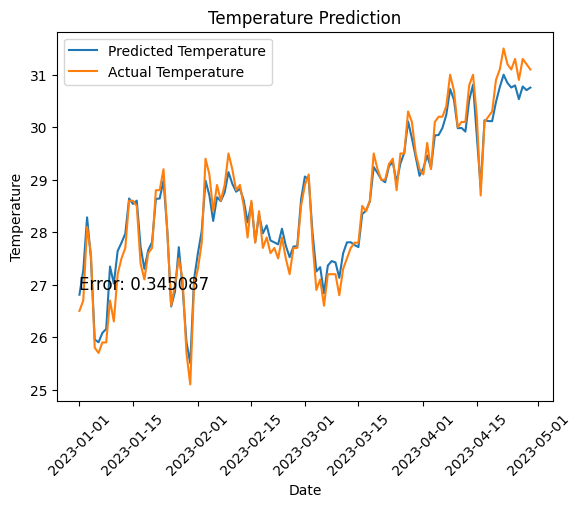

In [ ]:
import matplotlib.pyplot as plt


dates = results_df.index
actual_temp = results_df['actual_temp']
pred_temp = results_df['pred_temp']

# Create a figure and axes for the chart
fig, ax = plt.subplots()

# Plot the predicted and actual temperature values
ax.plot(dates, pred_temp, label='Predicted Temperature')
ax.plot(dates, actual_temp, label='Actual Temperature')

# Add the error field
error_value = 0.345087
ax.text(dates[0], actual_temp.iloc[0] + error_value, f'Error: {error_value}', fontsize=12, ha='left', va='bottom')

# Set the chart title and labels
ax.set_title('Temperature Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')

# Add a legend to the chart
ax.legend()

# Rotate the x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

In [ ]:
errors = {}

# Iterate through each target variable and extract the corresponding error value
for t in target_vars:
    error_value = error_df.loc[f"error_{t}", "error"]
    errors[t] = error_value
errors

{'tempmax': 1.2710376234156706,
 'tempmin': 0.926438594268757,
 'temp': 0.3450867745833199,
 'humidity': 23.752391904240802,
 'precip': 16.0454375272414,
 'windspeed': 10.103956952667716,
 'sealevelpressure': 0.63937578011907,
 'visibility': 0.3081590851062581,
 'uvindex': 1.7398087131599589}

In [ ]:
import numpy as np
future_dates = pd.date_range(start="2023-05-1", periods=345)
predictions_df = pd.DataFrame(index=future_dates)
future_data = pd.DataFrame(index=future_dates, columns=predictors)
past_data = core_weather.loc[: "2022-12-31"]

for i, date in enumerate(future_dates):
    same_day_data = past_data[past_data.index.dayofyear == date.dayofyear]  # Filter past data for the same day
    average_data = same_day_data.mean()
    random_noise = {var: np.random.normal(0, np.sqrt(errors[var])) for var in errors}
    future_data.loc[date] = average_data[predictors].values + list(random_noise.values())  # Convert dict_values to list

future_data

<ipython-input-25-dc32948329bd>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_data = same_day_data.mean()
<ipython-input-25-dc32948329bd>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  average_data = same_day_data.mean()
<ipython-input-25-dc32948329bd>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this 

,tempmax,tempmin,temp,humidity,precip,windspeed,sealevelpressure,visibility,uvindex
2023-05-01,34.805571,25.264882,29.835806,73.851936,-2.785593,19.180358,1008.811858,9.342958,7.393076
2023-05-02,35.931928,28.214944,29.627457,67.589905,2.249224,23.205814,1007.360552,9.576195,4.852064
2023-05-03,35.70267,26.642961,29.46736,78.179311,7.468943,22.135053,1009.739029,9.584637,8.754816
2023-05-04,35.226782,25.302702,30.468311,73.556875,-1.866817,17.210794,1007.983949,10.843757,9.217792
2023-05-05,35.61713,25.911908,31.443479,66.473979,-1.398847,19.976579,1006.988843,9.749349,7.549993
...,...,...,...,...,...,...,...,...,...
2024-04-05,35.241861,24.891519,30.305708,70.549388,2.318836,20.667571,1011.258695,10.218854,9.935529
2024-04-06,34.785261,27.034244,30.525348,65.134762,6.476149,19.936826,1009.794903,10.211532,6.772835
2024-04-07,33.981861,26.652739,29.694331,71.538302,-2.769572,18.199253,1009.107886,9.697083,9.567314
2024-04-08,34.0209,24.211177,28.554528,69.464006,0.167378,19.879281,1008.553099,9.104201,10.511679


In [ ]:
# Iterate through each target variable
predictions_future = {}
results_future = pd.DataFrame(index=future_dates)
import pickle

# Load the saved regression models from file

for t in target_vars:
    with open(f'reg_models_{t}.pkl', 'rb') as file:
        reg_models = pickle.load(file)
    predictors_sub = predictors
    reg_future = reg_models[t]
    predictions_future = reg_future.predict(future_data[predictors_sub])
    results_future[f"{t}"] = predictions_future
# Display the predicted values for future dates
results_future

,tempmax,tempmin,temp,humidity,precip,windspeed,sealevelpressure,visibility,uvindex
2023-05-01,34.314395,26.027273,29.481528,75.313527,6.133253,18.998869,1008.601325,9.575822,7.161841
2023-05-02,34.072761,25.960935,29.070228,70.450050,2.930958,20.747595,1007.709254,9.665913,6.466216
2023-05-03,34.574457,26.127480,29.447008,76.820883,4.545673,20.038775,1009.572804,9.645120,8.457483
2023-05-04,34.606091,26.671506,30.019881,76.772775,6.155452,19.686753,1007.824499,10.226817,7.843986
2023-05-05,35.223860,27.241858,30.575168,71.716547,7.727344,20.910671,1006.881894,9.957087,6.891986
...,...,...,...,...,...,...,...,...,...
2024-04-05,35.201037,26.273072,30.065809,71.423684,4.261210,19.600626,1010.718305,10.092765,8.905309
2024-04-06,34.877555,26.548454,29.998684,67.782684,2.911166,19.782458,1009.621503,10.116281,7.396633
2024-04-07,34.282501,26.237391,29.543612,71.576526,2.322193,18.742020,1009.075926,9.826514,8.742483
2024-04-08,33.489531,24.818597,28.474415,70.622827,4.105567,19.123129,1008.649103,9.527029,9.153313


In [ ]:
results_future.to_csv('/content/drive/MyDrive/Weather/results_future.csv', index=True, index_label='Date')